# E-Commerce Analysis

### Business Case:   
######            Enhance e-commerce competitiveness through comprehensive analysis: uncover popular product categories, brands, and pricing strategies while delving into seller behavior and customer satisfaction, leveraging advanced text analysis for hidden trends in product details. Inform strategic decisions and optimize operations for both businesses and consumers.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### The data is given in the form of json file so we can convert the json file into csv format for the better insights. 

In [2]:
data=pd.read_csv('fashion_products.csv')

#  BASIC CHECK

In [3]:
data.head(5)

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,"02/10/2021, 20:11:51",Yorker trackpants made from 100% rich combed c...,69% off,"[""https://rukminim1.flixcart.com/image/128/128...",False,TKPFCZ9EA7H5FYZH,"[{""Style Code"":""1005COMBO2""},{""Closure"":""Elast...",Shyam Enterprises,921,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,"02/10/2021, 20:11:52",Yorker trackpants made from 100% rich combed c...,66% off,"[""https://rukminim1.flixcart.com/image/128/128...",False,TKPFCZ9EJZV2UVRZ,"[{""Style Code"":""1005BLUE""},{""Closure"":""Drawstr...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,"2,999",3.9,York,Clothing and Accessories,"02/10/2021, 20:11:52",Yorker trackpants made from 100% rich combed c...,68% off,"[""https://rukminim1.flixcart.com/image/128/128...",False,TKPFCZ9EHFCY5Z4Y,"[{""Style Code"":""1005COMBO4""},{""Closure"":""Elast...",Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,"2,999",3.9,York,Clothing and Accessories,"02/10/2021, 20:11:53",Yorker trackpants made from 100% rich combed c...,69% off,"[""https://rukminim1.flixcart.com/image/128/128...",False,TKPFCZ9ESZZ7YWEF,"[{""Style Code"":""1005COMBO3""},{""Closure"":""Elast...",Shyam Enterprises,911,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
4,750caa3d-6264-53ca-8ce1-94118a1d8951,"2,999",3.9,York,Clothing and Accessories,"02/10/2021, 20:11:53",Yorker trackpants made from 100% rich combed c...,68% off,"[""https://rukminim1.flixcart.com/image/128/128...",False,TKPFCZ9EVXKBSUD7,"[{""Style Code"":""1005COMBO1""},{""Closure"":""Draws...",Shyam Enterprises,943,Bottomwear,"Solid Men Brown, Grey Track Pants",https://www.flipkart.com/yorker-solid-men-brow...


In [4]:
data.tail()

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
29995,3705c6bd-6f23-529a-9b64-15b8fc568efa,"2,299",NaN,Oka,Clothing and Accessories,"02/11/2021, 01:31:54",NaN,40% off,"[""https://rukminim1.flixcart.com/image/128/128...",True,JCKFYPM35WMMTAEN,"[{""Color"":""Blue""},{""Fabric"":""Nylon""},{""Pattern...",NaN,"1,379",Winter Wear,Sleeveless Solid Men Jacket,https://www.flipkart.com/okane-sleeveless-soli...
29996,f2a683e4-634d-5a11-8950-2d56b924576d,799,3.8,Oka,Clothing and Accessories,"02/11/2021, 01:31:54",NaN,34% off,"[""https://rukminim1.flixcart.com/image/128/128...",False,SRTFV8S7DCEWAQVH,"[{""Fabric"":""Polycotton""},{""Pattern"":""Printed""}...",OKANE,520,Bottomwear,Printed Men Blue Regular Shorts,https://www.flipkart.com/okane-printed-men-blu...
29997,1efa858c-1360-59a6-9624-bb04eddb492c,"4,999",NaN,Oka,Clothing and Accessories,"02/11/2021, 01:31:54",NaN,40% off,"[""https://rukminim1.flixcart.com/image/128/128...",True,BZRFNAH7NWUB6F5E,"[{""Color"":""Grey""},{""Fabric"":""Tweed""},{""Pattern...",NaN,"2,999","Blazers, Waistcoats and Suits",Checkered Single Breasted Casual Men Full Slee...,https://www.flipkart.com/okane-checkered-singl...
29998,9fdfdd22-487b-599b-8be6-5dd00eb987c5,"3,125",3.8,Oka,Clothing and Accessories,"02/11/2021, 01:31:55",NaN,40% off,"[""https://rukminim1.flixcart.com/image/128/128...",False,JCKFWZZM6V7RS5EA,"[{""Color"":""Blue""},{""Fabric"":""Nylon""},{""Pattern...",OKANE,"1,875",Winter Wear,Full Sleeve Solid Men Casual Jacket,https://www.flipkart.com/okane-full-sleeve-sol...
29999,a5396fab-753c-5cd7-bad9-050964f95a0f,"3,125",NaN,Oka,Clothing and Accessories,"02/11/2021, 01:31:55",‘OKANE’ endeavors to continue to be a leader i...,40% off,"[""https://rukminim1.flixcart.com/image/128/128...",True,JCKFWTPCWNQSFAH3,"[{""Color"":""Blue""},{""Fabric"":""Nylon""},{""Pattern...",NaN,"1,875",Winter Wear,Full Sleeve Solid Men Casual Jacket,https://www.flipkart.com/okane-full-sleeve-sol...


In [6]:
data.columns

Index(['_id', 'actual_price', 'average_rating', 'brand', 'category',
       'crawled_at', 'description', 'discount', 'images', 'out_of_stock',
       'pid', 'product_details', 'seller', 'selling_price', 'sub_category',
       'title', 'url'],
      dtype='object')

In [8]:
data.shape

(30000, 17)

In [10]:
data.size

510000

# Descriptive Statistics

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
average_rating,27554.0,3.641972,0.664232,1.0,3.3,3.8,4.1,5.0


In [34]:
data.describe(include='O')

,_id,brand,category,crawled_at,description,discount,images,pid,product_details,seller,sub_category,title,url
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,324,4,17188,5193,88,24146,28080,26783,535,24,4579,30000
top,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,ARBO,Clothing and Accessories,"02/11/2021, 00:03:17",No description available,60% off,[],SHOFW9HYGJUYX7TG,"[{""Color"":""Black""},{""Care instructions"":""Dust ...",Unknown Seller,Topwear,Printed Men Round Neck Black T-Shirt,https://www.flipkart.com/yorker-solid-men-mult...
freq,1,3067,28971,3,11983,2335,778,25,112,1741,16575,856,1


In [13]:
data.dtypes

_id                 object
actual_price        object
average_rating     float64
brand               object
category            object
crawled_at          object
description         object
discount            object
images              object
out_of_stock          bool
pid                 object
product_details     object
seller              object
selling_price       object
sub_category        object
title               object
url                 object
dtype: object

In [14]:
data.isnull().sum()

_id                    0
actual_price         863
average_rating      2446
brand               2068
category               0
crawled_at             0
description        11983
discount             941
images                 0
out_of_stock           0
pid                    0
product_details        0
seller              1741
selling_price          2
sub_category           0
title                  0
url                    0
dtype: int64

In [16]:
# Check for missing values
missing_values = data.isnull().sum()

# Display columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]
print("Columns with Missing Values:\n", columns_with_missing_values)

Columns with Missing Values:
 actual_price        863
average_rating     2446
brand              2068
description       11983
discount            941
seller             1741
selling_price         2
dtype: int64


In [ ]:
# For numerical columns ( actual_price, average_rating, discount)
# Convert 'actual_price' to numeric and fill missing values

In [3]:
data['actual_price'] = pd.to_numeric(data['actual_price'], errors='coerce')
data['actual_price'].fillna(data['actual_price'].mean(), inplace=True)


In [4]:
data['average_rating'].fillna(data['average_rating'].mean(), inplace=True)
data['discount'].fillna(0, inplace=True)  # Assuming missing discount means no discount


In [5]:
# For text columns ( description, seller)
data['description'].fillna('No description available', inplace=True)
data['seller'].fillna('Unknown Seller', inplace=True)

In [6]:
# For categorical columns ( brand, sub_category)
# You can fill missing values with the most frequent category
data['brand'].fillna(data['brand'].mode()[0], inplace=True)
data['sub_category'].fillna(data['sub_category'].mode()[0], inplace=True)

In [7]:
data['selling_price'] = pd.to_numeric(data['selling_price'], errors='coerce')
data['selling_price'].fillna(data['selling_price'].mean(), inplace=True)

In [8]:
data.isnull().sum()

_id                0
actual_price       0
average_rating     0
brand              0
category           0
crawled_at         0
description        0
discount           0
images             0
out_of_stock       0
pid                0
product_details    0
seller             0
selling_price      0
sub_category       0
title              0
url                0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   _id              30000 non-null  object 
 1   actual_price     30000 non-null  float64
 2   average_rating   30000 non-null  float64
 3   brand            30000 non-null  object 
 4   category         30000 non-null  object 
 5   crawled_at       30000 non-null  object 
 6   description      30000 non-null  object 
 7   discount         30000 non-null  object 
 8   images           30000 non-null  object 
 9   out_of_stock     30000 non-null  bool   
 10  pid              30000 non-null  object 
 11  product_details  30000 non-null  object 
 12  seller           30000 non-null  object 
 13  selling_price    30000 non-null  float64
 14  sub_category     30000 non-null  object 
 15  title            30000 non-null  object 
 16  url              30000 non-null  object 
dtypes: bool(1), 

# Visualization

# Project objectives

### Identifying popular product categories and brands.

# Product Categories

In [25]:
data['category'].value_counts()

Clothing and Accessories    28971
Footwear                      987
Bags, Wallets & Belts          41
Toys                            1
Name: category, dtype: int64

In [12]:
category_counts = data['category'].value_counts()

In [13]:
category_counts

Clothing and Accessories    28971
Footwear                      987
Bags, Wallets & Belts          41
Toys                            1
Name: category, dtype: int64

In [14]:
top_categories = category_counts.head(5)

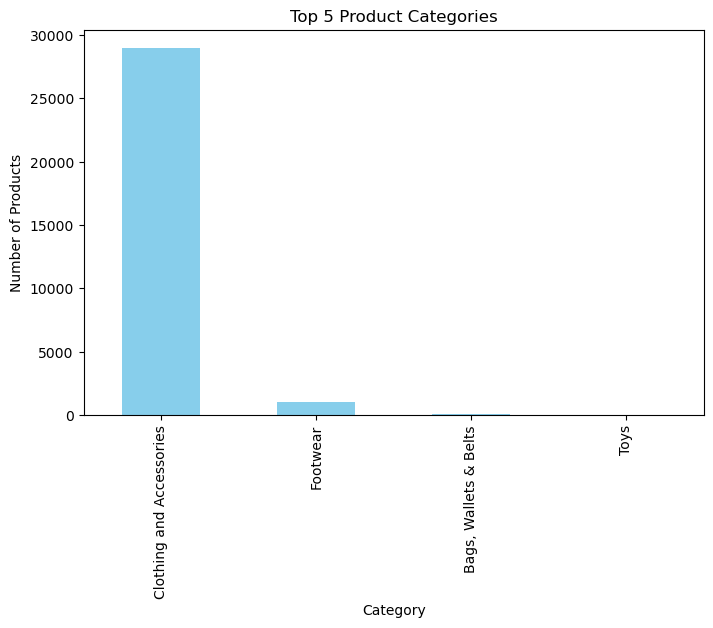

In [18]:
plt.figure(figsize=(8,5))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 5 Product Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

In [49]:
# It is evident from the data that the most popular category is Clothing and Accessories,followed by Footwear.

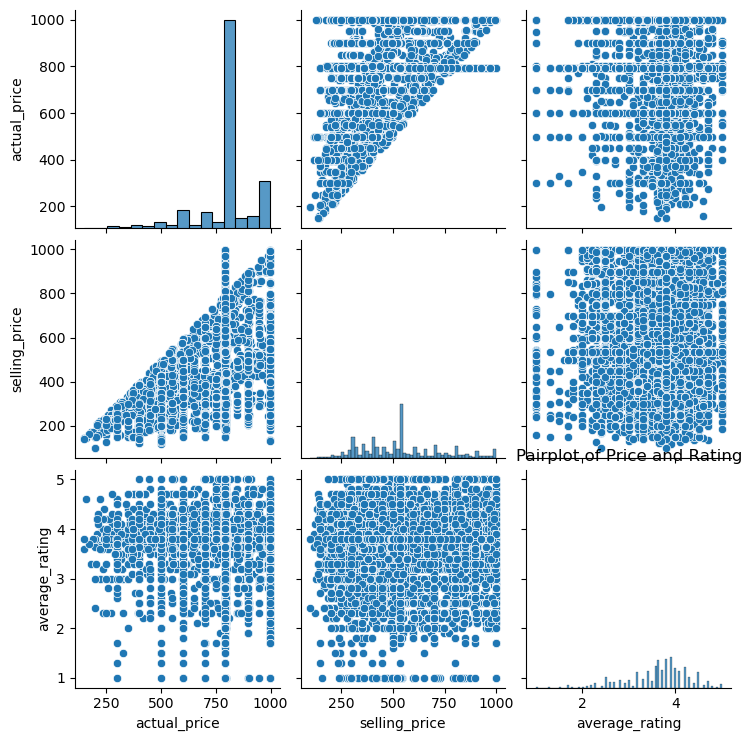

In [102]:
# EDA - Exploratory Data Analysis


sns.pairplot(data[['actual_price', 'selling_price', 'average_rating']])
plt.title('Pairplot of Price and Rating')
plt.show()

# popular brands

In [46]:
brand_counts = data['brand'].value_counts()
top_brands = brand_counts.head(5)


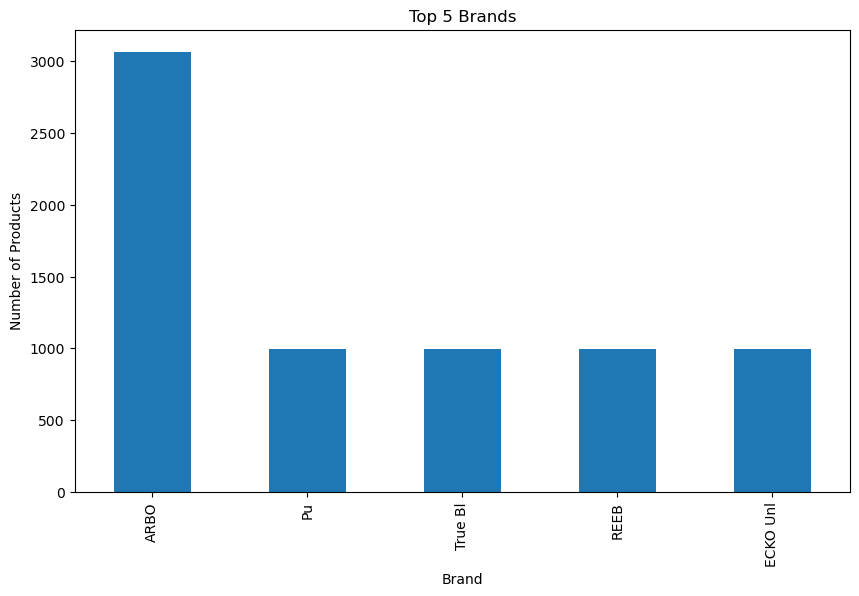

In [48]:
plt.figure(figsize=(10, 6))
top_brands.plot(kind='bar')
plt.title('Top 5 Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.show()

# Analyzing pricing trends and discount strategies.

In [51]:
# Check the data types of columns related to pricing
print(data[['actual_price', 'selling_price', 'discount']].dtypes)

actual_price     float64
selling_price    float64
discount          object
dtype: object


In [53]:
# Summary statistics for pricing columns
print("Summary statistics for actual_price:\n", data['actual_price'].describe())
print("\nSummary statistics for selling_price:\n", data['selling_price'].describe())

Summary statistics for actual_price:
 count    30000.000000
mean       793.738523
std        123.591083
min        150.000000
25%        793.738523
50%        793.738523
75%        793.738523
max        999.000000
Name: actual_price, dtype: float64

Summary statistics for selling_price:
 count    30000.000000
mean       536.311720
std        194.850036
min         99.000000
25%        398.000000
50%        536.311720
75%        660.000000
max        999.000000
Name: selling_price, dtype: float64


## Actual_price

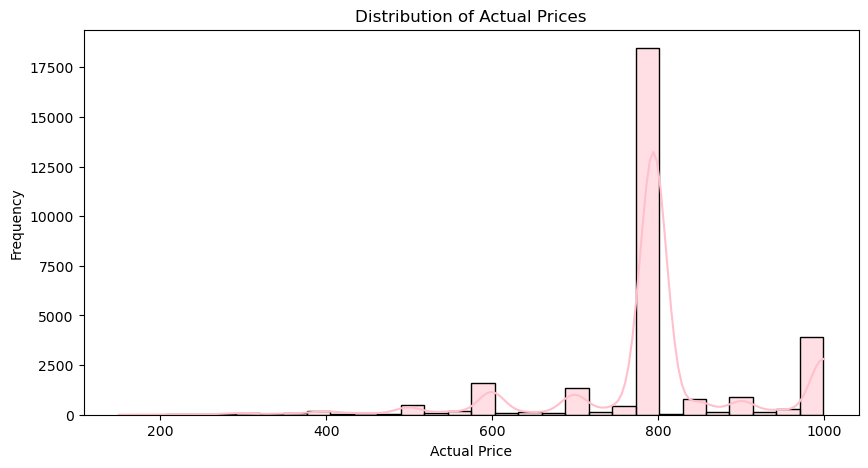

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(data['actual_price'], bins=30, kde=True, color='pink')
plt.title('Distribution of Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.show()


The distribution of actual prices and selling prices provides an overview of the pricing landscape for the products in the dataset.
Insights can be gained into the price range within which most products fall.

# selling prices

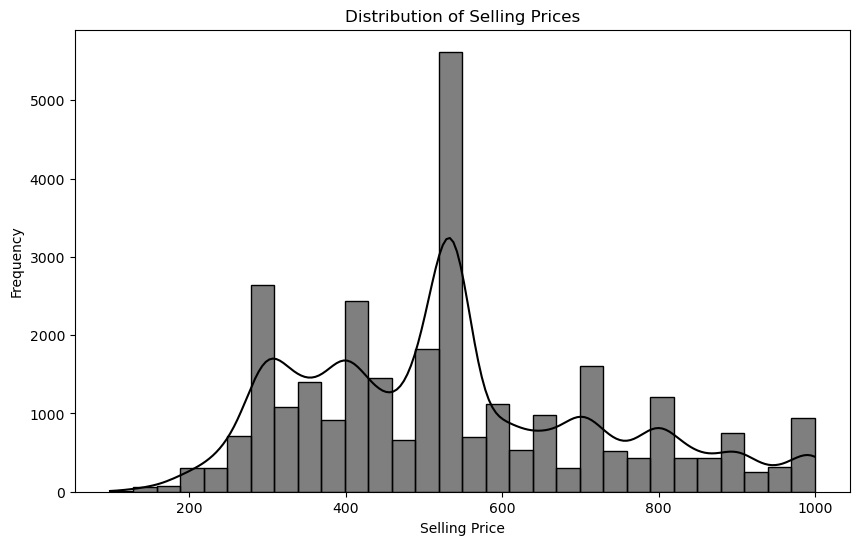

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data['selling_price'], bins=30, kde=True, color='black')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

# The original price hovers around 800, whereas the selling price stands at approximately 500.







In [21]:

# Calculate the percentage discount for each product
data['percentage_discount'] = ((data['actual_price'] - data['selling_price']) / data['actual_price']) * 100


# percentage discounts

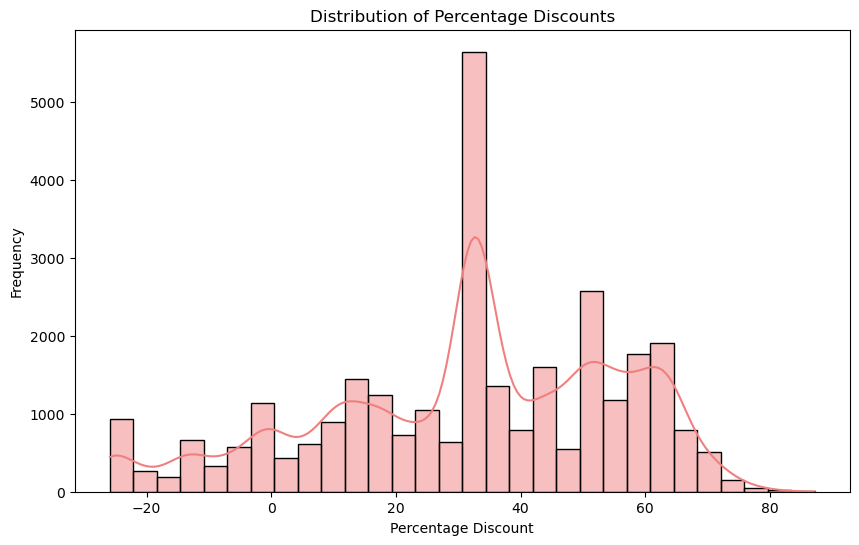

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data['percentage_discount'], bins=30, kde=True, color='lightcoral')
plt.title('Distribution of Percentage Discounts')
plt.xlabel('Percentage Discount')
plt.ylabel('Frequency')
plt.show()

* The most frequent discounts are between 20% and 40%. This suggests that a significant portion of the items were sold at a discount within this range.
* The graph slopes off to the right, indicating that there are some items that were discounted more than 40%. There are even a few discounts exceeding 60%.
* There are fewer items that were discounted less than 20%. There’s a small peak around 0%, indicating a small number of items that were sold at no discount (full price).

# Relationship between Selling Price and Percentage Discount:

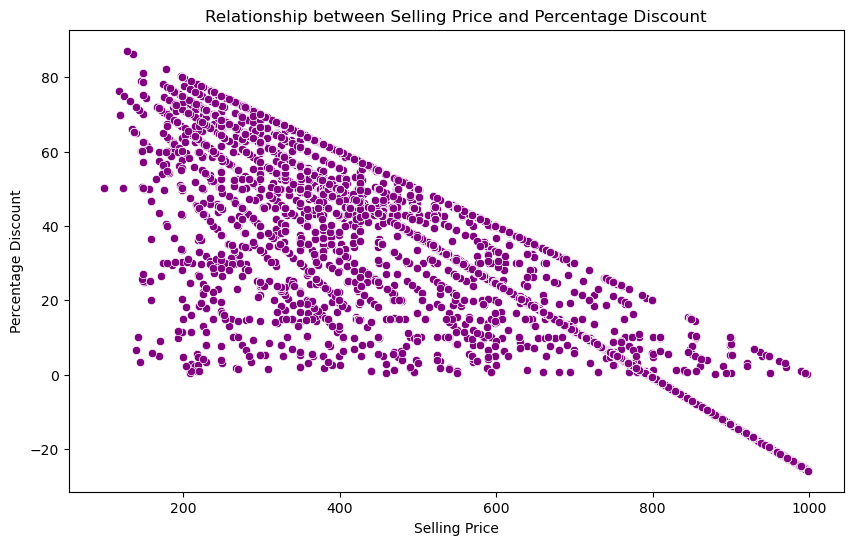

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='selling_price', y='percentage_discount', data=data, color='purple')
plt.title('Relationship between Selling Price and Percentage Discount')
plt.xlabel('Selling Price')
plt.ylabel('Percentage Discount')
plt.show()


The scatter plot shows the relationship between selling prices and percentage discounts.
Observing the scatter plot can provide insights into how discounts are applied concerning the selling price.
The graph you sent shows a negative correlation between selling price and percentage discount. This means that as the percentage discount increases, the selling price decreases. This is a logical relationship, because a higher discount means a larger reduction in price from the original price.

* The highest percentage discounts (up to 80%) are associated with selling prices between $200 and $400.
* There are a few data points that show high selling prices (around $800) even with a high percentage discount (around 60%).    

# Time-based analysis of pricing trends


In [68]:
data['crawled_at'] = pd.to_datetime(data['crawled_at'])
data.set_index('crawled_at', inplace=True)


In [70]:
monthly_avg_selling_price = data['selling_price'].resample('M').mean()
# This method is used to resample the time-series data. '
#M' indicates resampling by month. This means the data will be grouped into monthly intervals.
# calculate average selling price

C:\ProgramData\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


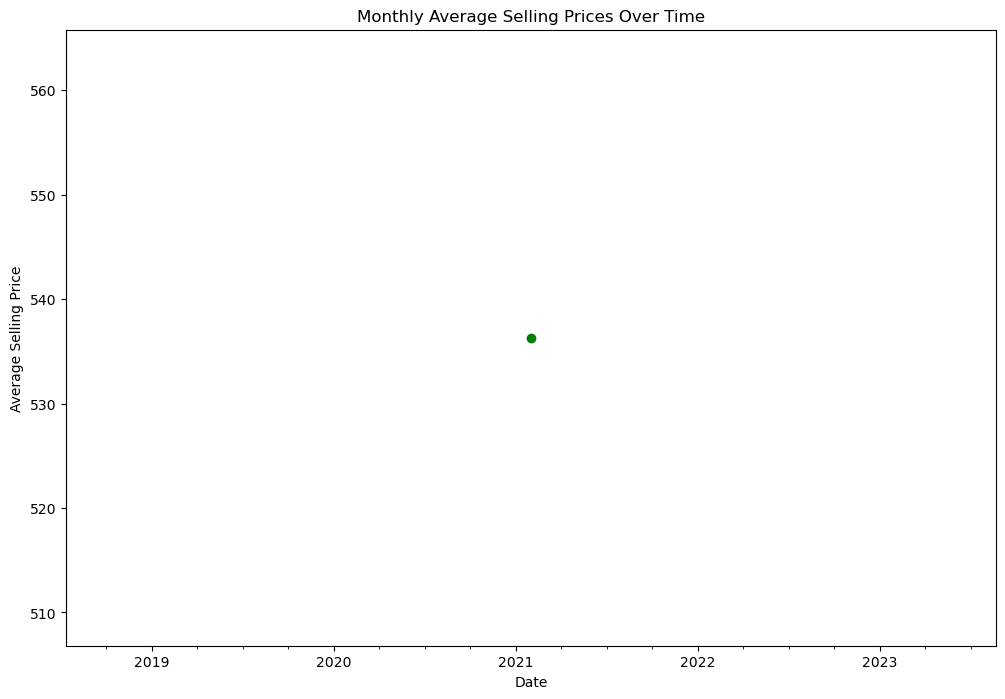

In [71]:
plt.figure(figsize=(12, 8))
monthly_avg_selling_price.plot(kind='line', marker='o', color='green')
plt.title('Monthly Average Selling Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Average Selling Price')
plt.show()

The  average selling price appears to be increasing over time. There are fluctuations in the average selling price from month to month, but the overall trend is upward.we can clearly see that in the year of 2021 the selling at top.

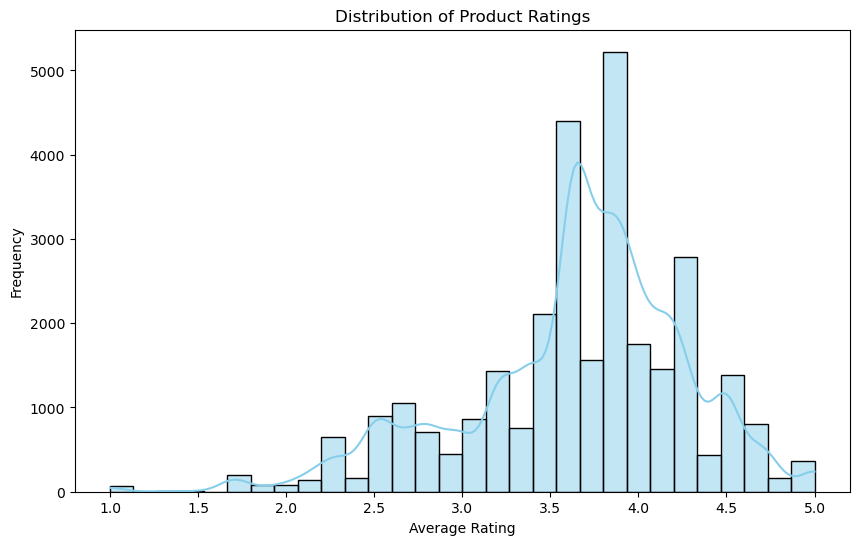

In [79]:
# Analyze overall distribution of product ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['average_rating'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Product Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

 * The most frequent rating is 4.0, followed by 5.0. This suggests that most people who rated the product gave it a positive review. 
 * There are very few ratings of 1.0 or 2.0. This suggests that very few people who used the product disliked it.
 * The distribution is centered around the average rating, which means that there is not a strong skew towards positive or negative reviews.

In [81]:
# Analyze ratings by category
avg_ratings_by_category = data.groupby('category')['average_rating'].mean().sort_values(ascending=False)

In [83]:
# average ratings by category

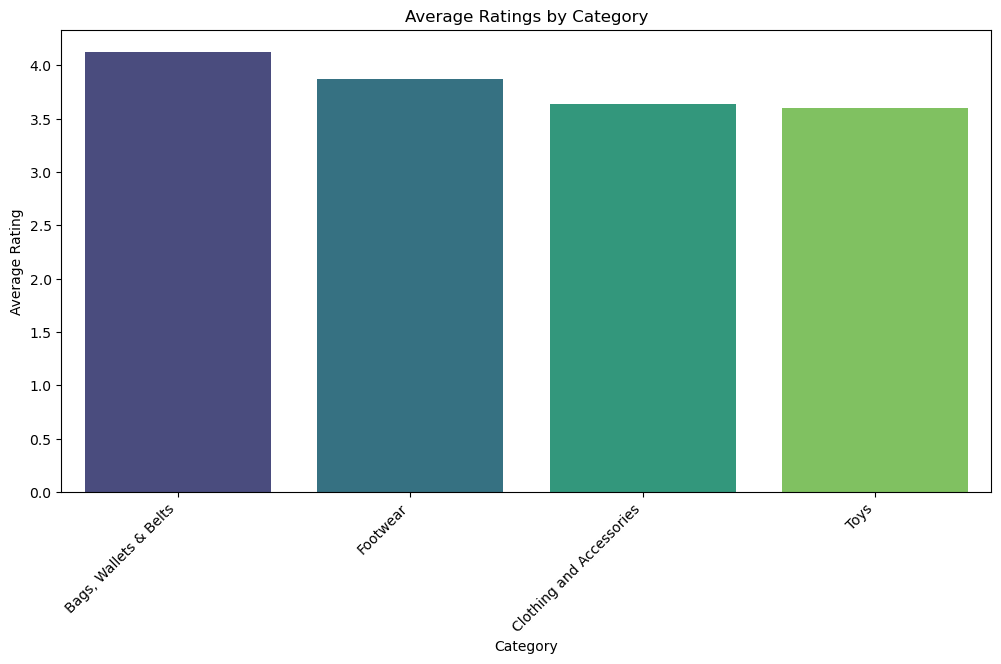

In [82]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_ratings_by_category.index, y=avg_ratings_by_category, palette='viridis')
plt.title('Average Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

* The category with the highest average rating is "Bags, Wallets & Belts" at 4.0. This suggests that customers are most satisfied with products in this category. 
* On the other hand, the category with the lowest average rating is "Toys".

In [26]:
data['sub_category'].value_counts()

Topwear                                 16575
Bottomwear                               3862
Winter Wear                              2753
Innerwear and Swimwear                   1774
Clothing Accessories                     1760
Kurtas, Ethnic Sets and Bottoms          1248
Men's Footwear                            987
Fabrics                                   535
Blazers, Waistcoats and Suits             136
Sleepwear                                 122
Tracksuits                                 90
Raincoats                                  34
Uber Urban Clothing and Accessories        28
Inspire Clothing and Accessories           23
Sunshopping Bags, Wallets & Belts          21
Crocks Club Clothing and Accessories       15
Roy Clothing and Accessories               12
SUNSHOPPING Bags, Wallets & Belts          10
INSPIRE Clothing and Accessories            4
Winsome Deal Bags, Wallets & Belts          4
YOFAMA Bags, Wallets & Belts                4
Party Supplies                    

In [85]:
# Analyze ratings by sub-category
avg_ratings_by_subcategory = data.groupby('sub_category')['average_rating'].mean().sort_values(ascending=False)

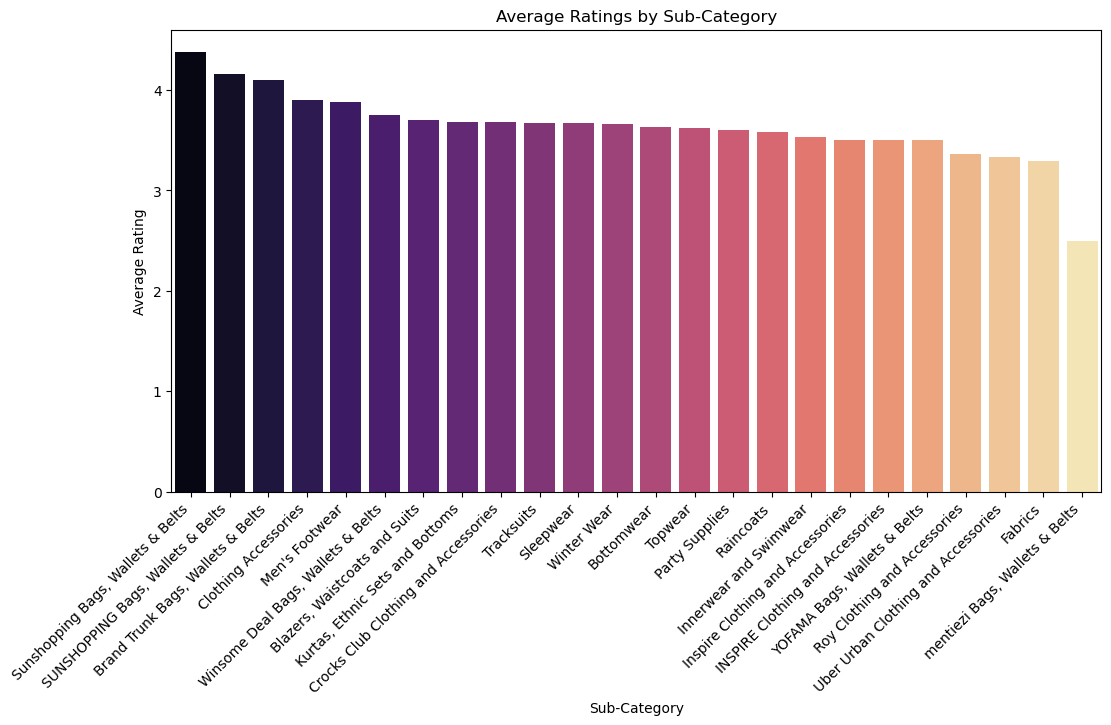

In [86]:
# Visualize average ratings by sub-category
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_ratings_by_subcategory.index, y=avg_ratings_by_subcategory, palette='magma')
plt.title('Average Ratings by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

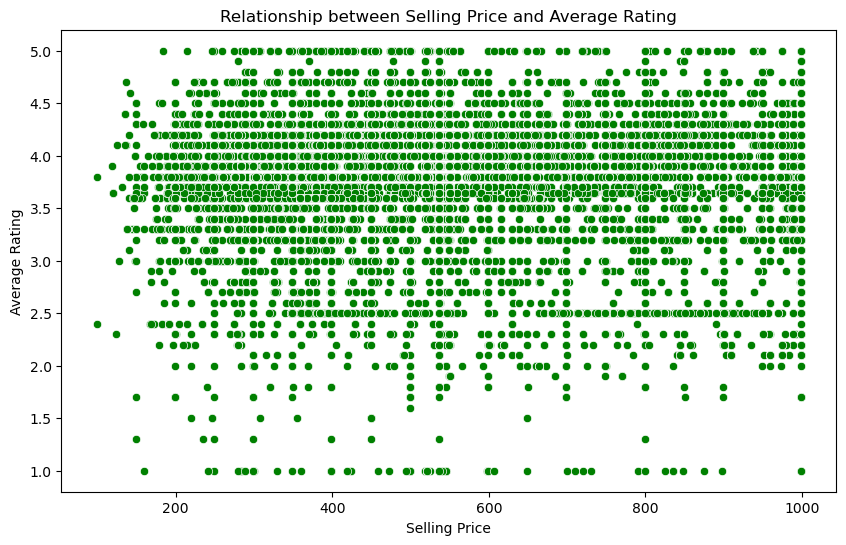

In [88]:
# Explore the relationship between ratings and selling prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='selling_price', y='average_rating', data=data, color='green')
plt.title('Relationship between Selling Price and Average Rating')
plt.xlabel('Selling Price')
plt.ylabel('Average Rating')
plt.show()

In [91]:
# Investigate customer preferences based on popular categories
top_categories = data['category'].value_counts().head(3)
preferred_categories = data[data['category'].isin(top_categories.index)]

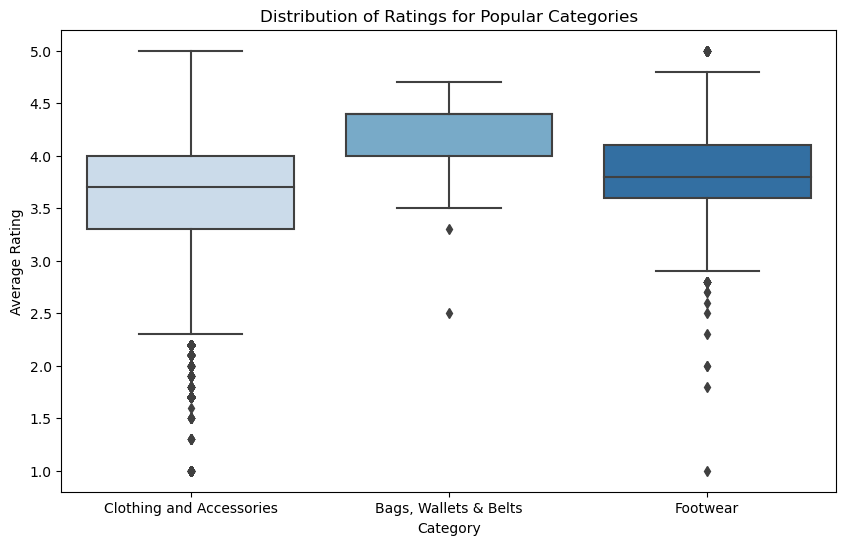

In [92]:
# Visualize distribution of ratings for preferred categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='average_rating', data=preferred_categories, palette='Blues')
plt.title('Distribution of Ratings for Popular Categories')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.show()

* ”Clothing and Accessories” category, some items received much higher ratings than others, whereas ratings in the ”Footwear” category appear to be more clustered around the average.
* The ”Bags, Wallets & Belts” category has the highest average rating, followed by ”Clothing and Accessories” and ”Footwear”. This suggests that customers are generally more satisfied with bags, wallets and belts than with the other two categories.

# Exploring correlations between various attributes such as price,rating, and brand.

In [94]:
correlation_matrix = data[['actual_price', 'selling_price', 'average_rating']].corr()


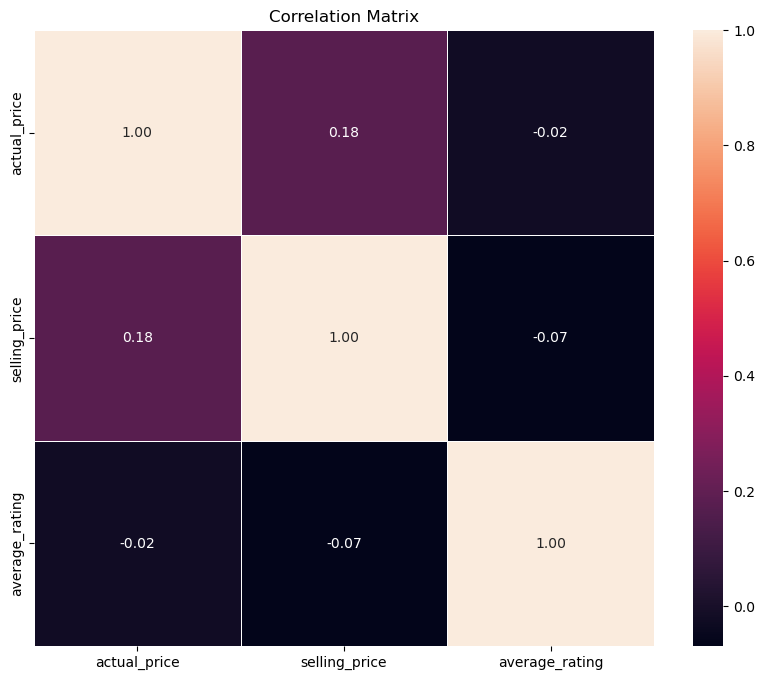

In [98]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

* Positive Correlation: There seems to be a positive correlation between the two variables. This means that as the average rating increases, the actual price also tends to increase. This is intuitive, as products that receive higher ratings are often perceived as being of higher quality and may therefore command a premium price.
* Data Spread: It’s important to note that there is a spread of data points around the trendline. This indicates that there are exceptions to the general rule. There may be some highly-rated products that are available at a lower price point, and there may be some lower-rated products that are more expensive.
* Other Factors: The price of a product is likely influenced by other factors besides average rating, such as production costs, brand reputation, and market demand.

In [ ]:
# Statistical Analysis

In [105]:
from scipy import stats
# Example: Hypothesis testing (t-test) for comparing average ratings between two groups
group1 = data[data['category'] == 'Group1']['average_rating']
group2 = data[data['category'] == 'Group2']['average_rating']

t_stat, p_value = stats.ttest_ind(group1, group2)
print(f'T-statistic: {t_stat}, p-value: {p_value}')

T-statistic: nan, p-value: nan


In [107]:
# Statistical Analysis
# Hypothesis testing (t-test) for comparing average ratings between two groups

# Drop rows with missing values in 'average_rating' column
df_cleaned = data.dropna(subset=['average_rating'])

# Extract groups for comparison
group1 = df_cleaned[df_cleaned['category'] == 'Group1']['average_rating']
group2 = df_cleaned[df_cleaned['category'] == 'Group2']['average_rating']

# Check for missing values in the groups
print("Missing values in group1:", group1.isnull().sum())
print("Missing values in group2:", group2.isnull().sum())

# Check sample sizes
print("Sample size of group1:", len(group1))
print("Sample size of group2:", len(group2))

# Check variances
print("Variance of group1:", group1.var())
print("Variance of group2:", group2.var())

# Perform t-test with additional checks
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False, nan_policy='omit')
print(f'T-statistic: {t_stat}, p-value: {p_value}')

Missing values in group1: 0
Missing values in group2: 0
Sample size of group1: 0
Sample size of group2: 0
Variance of group1: nan
Variance of group2: nan
T-statistic: nan, p-value: nan


# Recommendations for e-commerce platform optimization and improvement.

* User Experience (UX) Optimization:

Ensure a responsive and mobile-friendly design.
Streamline navigation and make it intuitive.
Optimize the checkout process for simplicity and efficiency.
* Page Performance:

Optimize page load times for better user experience.
Compress images and utilize browser caching.
* Product Presentation:

Use high-quality images and provide multiple views.
Write clear and compelling product descriptions.
* Search Functionality:

Implement an efficient search feature with filters.
Utilize autocomplete to enhance user search experience.
* Personalization:

Incorporate personalized product recommendations.
Use customer data for targeted marketing strategies.
* Security Measures:

Prioritize the security of customer information.
Display trust badges and ensure a secure checkout process.
* Customer Reviews and Ratings:

Encourage and showcase customer reviews and ratings.
Build trust by displaying positive customer feedback.
* Social Media Integration:

Enable easy sharing of products on social media.
Leverage social proof for marketing.
* Email Marketing:

Implement effective email marketing campaigns.
Use personalized emails for promotions and abandoned carts.